# MathAData - Module introduction à l'IA

## Classification des images de 2 et de 7


!!! abstract Dans ce TP, veuillez compléter tous les textes à trous (...)
Nous allons travailler sur un algorithme permettant de classer des images en fonction du chiffre représenté sur celles-ci. Pour commencer, nous étudierons des images avec les chiffres 2 et 7.
!!!

# I. Visualisation des données

!!! tip On commence par importer les données dont nous aurons besoin :
Sélectionnez la cellule ci-dessous puis appuyer sur le bouton 'Exécuter' ou les touches Majuscule + Entrée de votre clavier pour exécuter le code. Lorsque la cellule aura été correctement executée, un nombre apparaîtra entre les crochets sur la gauche de la cellule.
!!!

In [ ]:
from utilitaires_mnist_2 import *

## I.1 Rappels Python

!!! tip Le type list
En python, une liste est un type de donnée permettant de regrouper plusieurs valeurs avec un ordre donné. On définit une liste à l'aide de crochets. On peut initialiser une liste vide ou avec des éléments en les spécifiant séparés par des virgules entre les crochets.
!!!

In [ ]:
# liste vide :
liste_vide = []
print(liste_vide)
# une liste peut contenir des nombres :
liste = [1, 5.4, -3]
print(liste)

!!! tip
On accède à l'élément $i$ d'une liste en faisant `liste[i]`.
!!!

<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> En Python les indices sont comptés à partir de 0, le premier élément d'une liste est donc liste[0].
</div>

!!! info Avec la fonction `print(...)`, afficher le premier élément de la liste `liste` :
**Rappel** : Pour appeler (utiliser) une fonction, la syntaxe est ```ma_fonction(paramètres)```. Les paramètres d'une fonction sont des variables utilisées au sein de la fonction pour modifier son comportement. La fonction print par exemple affiche ses paramètres séparés par des espaces.
!!!

In [ ]:
# Afficher le premier élément de la liste
...

## I.2 Image numérique

Nous allons commencer à manipuler des images en noir et blanc (aussi appelées images en niveaux de gris).


!!! tip Une image en niveaux de gris : tableau 2D de pixels.
Lorsque le tableau représente une image en niveaux de gris, chaque élément du tableau correspond à un pixel dont la valeur est un entier compris entre 0 et 255, du plus foncé au plus clair, donc 0 pour noir et 255 pour blanc.  

Pour accéder à la valeur d'un pixel de l'image x, on peut utiliser la commande `x[i,j]` **où i est le numéro de ligne et j le numéro de colonne.** 
<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> N'oubliez pas que les indices sont comptés à partir de 0
</div>

Pour récupérer la valeur du pixel dans le coin en haut à gauche (première ligne, première colonne) on fait donc `x[0,0]` et pour celui à la 8ème ligne et 6ème colonne, `x[7,5]` 
!!!

!!! info Entrainez vous sur une image $2 \times 2$
Testez des valeurs de pixels sur l'image suivante :
!!!

In [ ]:
# Créé une image 2 X 2 :
image = creer_tableau(2,2)

# Modifiez les pixels de l'image avec des valeurs entre 0 (noir) et 255 (blanc)
image[0,0] = ...
image[0,1] = ...
image[1,0] = ...
image[1,1] = ...

print(image)

!!! info Affichez l'image
Nous avons créé une fonction `affichage` permettant de reconstituer une image à partir d'un tableau. Testez la sur votre image :
!!!

In [ ]:
affichage(image)

!!! info Exécuter l'instruction ci-dessous
Nous avons chargé des images de 2 et 7 de résolution $28 \times 28$ pixels sous forme de tableaux de cette même taille. La variable x est la première image :
!!!

In [ ]:
# Affichez l'image x :
affichage(x)

!!! info Compléter l'algorithme ci-dessous pour afficher la valeur du pixel central
!!!

In [ ]:
# Valeur du pixel (14,14) : 
pixel_central = x[14,14]
...

### Accéder à une « tranche » de pixels

!!! tip Selectionner uniquement certaines lignes ou colonnes
* La commande `x[a:b,c:d]` "recadre" l'image en ne gardant que les pixels appartenant aux lignes `a` à `b` (exclu) et colonnes `c` à `d` (exclu).
* Pour récupérer tous les pixels de `x` appartenant aux lignes 0 à 6, on utilise `x[0:7,0:28]`
* Pour récupérer tous les pixels de `x` appartenant aux colonnes 0 à 6, on utilise `x[0:28,0:7]`
* Pour récupérer tous les pixels de `x` au centre appartenant aux lignes 13 et 14 et colonnes 13 et 14, on utilise `x[13:15,13:15]`

!!!

!!! info Écrire une ligne de code pour afficher uniquement les colonnes 11 à 23 de l'image $x$ :</font></b>
!!!


In [ ]:
# Visualisez les colonnes 11 à 23 de l'image x :
affichage(x[0:28,...:...])

!!! info Affichez directement la valeur des pixels des colonnes 11 à 23 de l'image x :
!!!


In [ ]:
# Affichez directement la valeur des pixels des colonnes 11 à 23 de l'image x :
colonnes_centrales = x[0:28,11:24]

... 

# II. Challenge : classer les chiffres 2 et 7

Nous voilà prêts à attaquer la résolution du problème c'est à dire déterminer à partir d'une image x (un tableau 2D 28 X 28) quel chiffre est écrit.

**On a deux classes d'images :**
- la classe des chiffres $2$
- la classe des chiffres $7$

On note y la classe de l'image x.

!!! tip Pour visualiser les 10 premières images, exécuter la fonction `affichage_dix` sur la base de donnée  `x_train` 
!!!

In [ ]:
# Afficher les 10 premières images de x_train :
affichage_dix(x_train)

## II.1 Choix a priori de la caractéristique : La moyenne de valeur des pixels

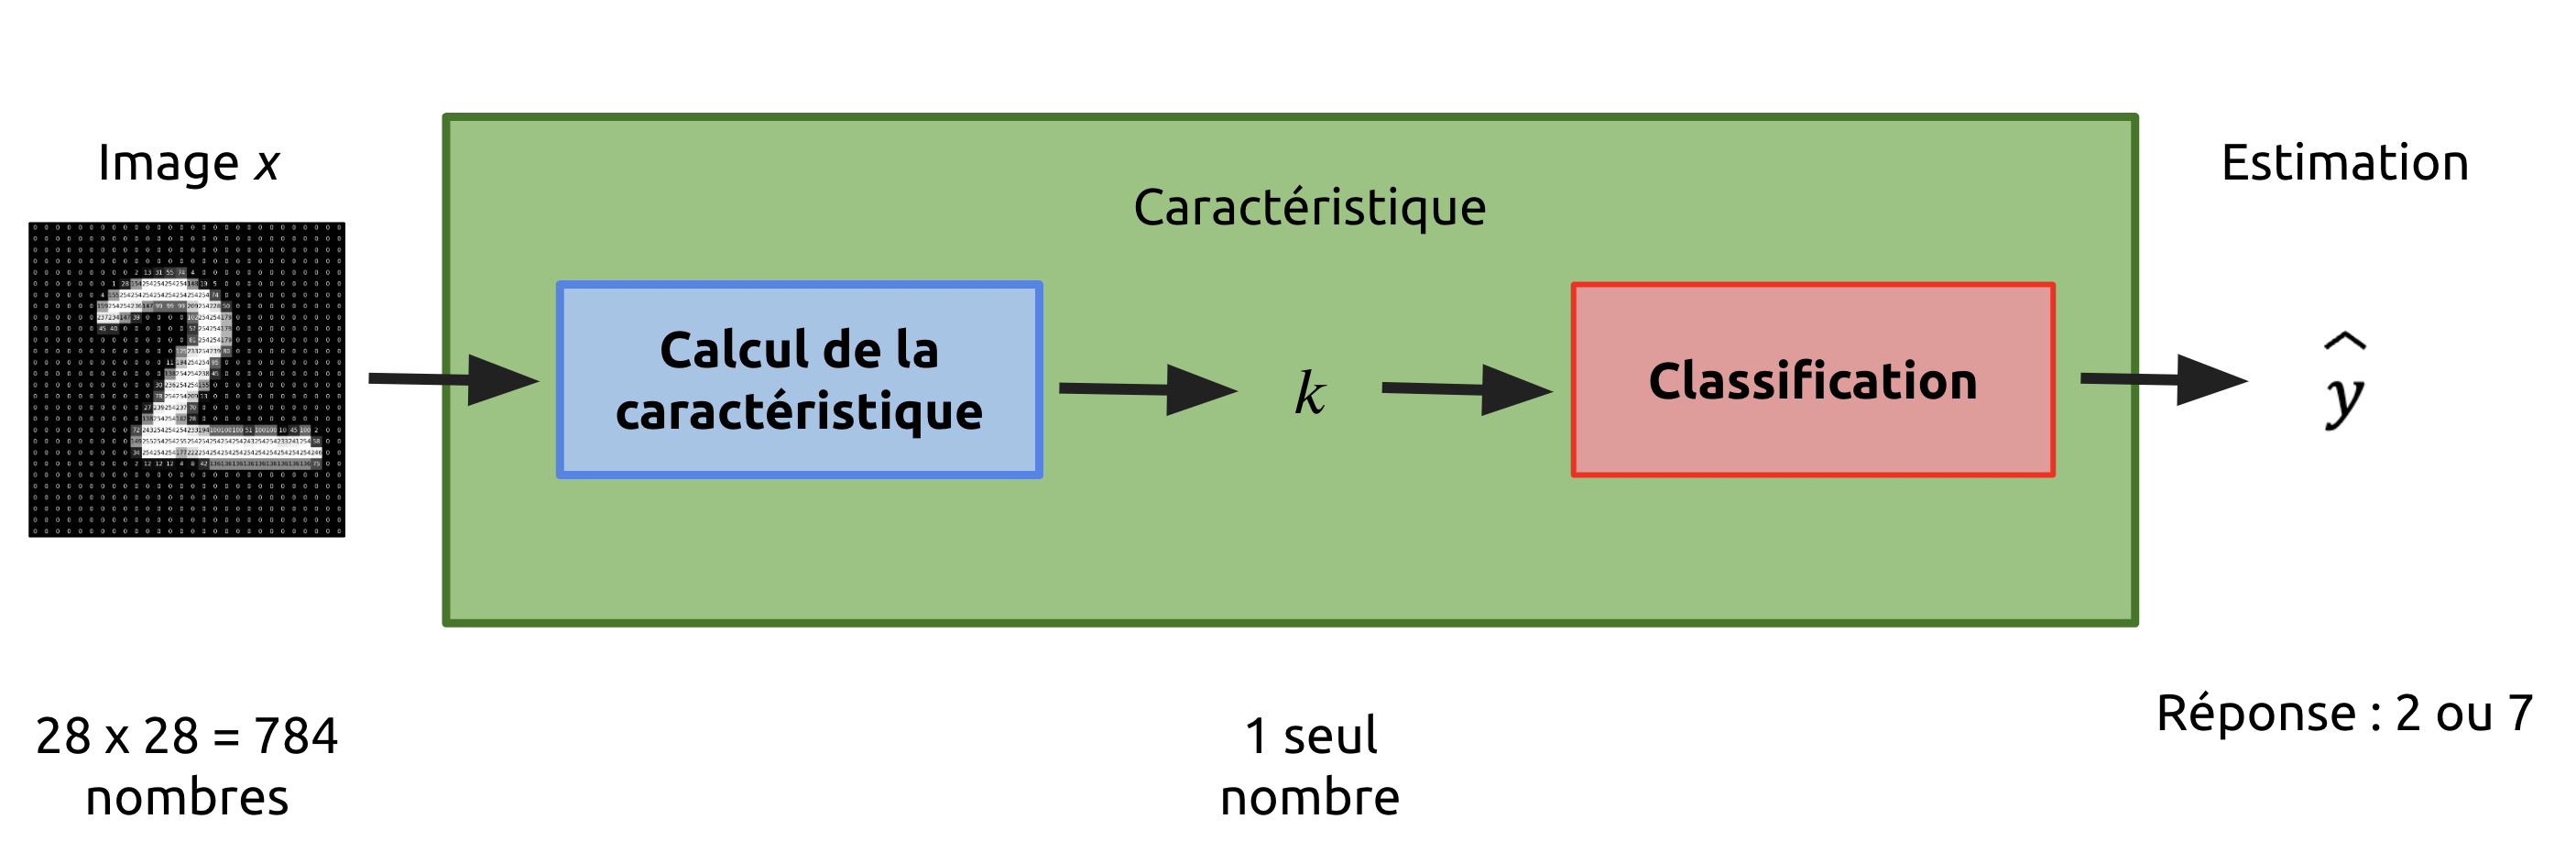

!!! tip  Caractéristique de référence :
Une caractéristique est une fonction appliquée à nos données, ici les images, pour en extraire une information dont l'objectif est de nous permettre de différencier les classes.

On peut par exemple commencer par calculer la valeur moyenne d'un pixel de l'image pour déterminer si cette moyenne est très différente entre les images de 2 et de 7. Nous avons déjà codé la fonction moyenne pour faire le calcul.
!!!

In [ ]:
# Une fonction qui calcule et renvoie la caractéristique de l'image x

def caracteristique(x):
    k = moyenne(x)
    return k

!!! info En utilisant la fonction caracteristique, afficher la valeur moyenne des pixels des 10 images précédentes 
!!!

In [ ]:
affichage_dix(x_train)

for i in range(10):
    k = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : k(x) = '+str(round(k,2))+',   y = '+str(y)+'\n')

!!! question
la moyenne semble t-elle plus élevée pour les images de l'une des deux classes ? Laquelle ?
!!!

## II.2 Classificateur

!!! tip Algorithme de classification :

La caractéristique doit nous permettre de trancher sur la classe de chaque image. Pour que notre algorithme puisse renvoyer la classe des images :

* On choisit un seuil noté  `t` qui va être la valeur de la caractéristique séparant les deux classes d'images
* On compare la caractéristique de chaque image au seuil `t` et on renvoit l'entier $2$ ou $7$ en fonction de si la caractéristique est supérieure ou inférieure au seuil :
!!!

!!! info Choix du seuil

Afficher les valeurs de caractéristiques pour des images de `x_train` :
!!!

In [ ]:
affichage_dix(x_train)

for i in range(10):
    k = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : k(x) = '+str(round(k,2))+',   y = '+str(y)+'\n')

!!! info D'après ces obervations, choisissez un seuil `t` et complétez la fonction classification :
!!!

In [ ]:
# Seuil à compléter :

t = ...

<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> cette fonction doit calculer <b>l'estimation de la classe </b> de x en fonction de sa caractéristique k, donc 2 pour les images de 2 et 7 pour les images de 7.
</div>

In [ ]:
# Algorithme de classification à compléter :

def classification(k, t):
    if k > t:
        return ...
    else:
        return ...

In [ ]:
# Testez votre fonction sur la première image x
print(classification(caracteristique(x),t))

## II.3 Calcul de l'erreur d'entraînement pour ce paramètre

!!! tip 
L'erreur d'entraînement est le poucentage d'images que le classificateur classe mal.  C'est donc :

 
  
$$
e_{train}(t) = 100 \times \frac{\text{Nombre d'images d'entraînement mal classées}} {\text{Nombre d'images d'entraînement}}
$$
 

Notez que cette fonction dépend du paramètre ``t``.  
!!!

!!! info Exécuter la cellule suivante pour calculer votre erreur d'entraînement :</font></b>
!!!

In [ ]:
# calcul de l'erreur d'entraienement grâce 

e_train = erreur_train(x_train, y_train, t, classification, caracteristique)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")

!!! info Qu'en pensez-vous ?
!!!

## II.4 Minimisation de la fonction erreur

!!! tip
Dans l'étape précédente, vous avez choisi arbitrairement un seuil t en fonction de vos observations sur les 10 premières images. Ce processus n'est pas optimal car vous l'avez probablement choisi instinctivement en prenant en compte une très petite partie des images (l'ensemble d'entraînement en contient plusieurs milliers).

Pour trouver le meilleur paramètre ``t`` nous traçons la fonction $e_{train}(t)$ pour trouver son minimum. 
!!!

!!! info  Exécuter la cellule suivante pour afficher la fonction erreur :</font></b>
!!!

In [ ]:
t_min = 0
t_max = 70

tracer_erreur(t_min, t_max, classification, caracteristique)

!!! info 1. Quelle valeur de ``t`` pouvez prendre pour avoir le moins d'erreur ? 
!!!

!!! info 2. Complétez la cellule suivante avec ce seuil et exécutez les 2 cellules suivantes pour obtenir votre nouvelle erreur d'entraînement : 
!!!

In [ ]:
# Nouveau seuil à compléter, d'après la figure précédente :

t = ...

In [ ]:
# Calcul de l'erreur d'entraienement avec ce nouveau seuil :  

e_train = erreur_train(x_train, y_train, t, classification, caracteristique)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")

## II.5 Amélioration de la caractéristique : faites mieux !


<b><font color=blue>Pour diminuer encore l'erreur, vous allez définir votre propre caractéristique. Utilisez les propriétés des images pour inventer une caractéristique qui fait le moins d'erreur possible ! </font></b>

### 1. Définissez dans la cellule suivante votre caractéristique :

!!! tip Rappel
La caractéristique doit renvoyer une valeur que vous pensez différente entre les images de 2 et les images de 7.
!!!

In [ ]:
# Votre propre caractéristique : 

def caracteristique(x):
    
    ...

    return ...

### 2. Réglez la fonction classification : 

Afficher en excécutant la cellule suivante les valeurs de votre caractéristique pour 10 images : 

In [ ]:
affichage_dix(x_train)

for i in range(10):
    k = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : k(x) = '+str(round(k,2))+',   y = '+str(y)+'\n')

En déduire comment compléter la fonction de classification, c'est à dire si votre caractéristique est élevée pour les images de 2 ou pour les images de 7 :  

In [ ]:
# Algorithme de classification à compléter :

def classification(k, t):
    if k > t:
        return ...
    else:
        return ...

### 3. Choisir un seuil qui minimise la fonction erreur : 

In [ ]:
# Changer t_min et t_max si besoin, pour l'affichage de la courbe d'erreur
t_min = 0
t_max = 70

tracer_erreur(t_min, t_max, classification, caracteristique)

In [ ]:
# Seuil à compléter :

t = ...

In [ ]:
# Calcul de l'erreur d'entraienement avec ce nouveau seuil :  

e_train = erreur_train(x_train, y_train, t, classification, caracteristique)
print("\n \n --> Erreur d'entraînement avec ma caractéristique =", f"{100*e_train:.2f}% \n \n")

## II.6 Soumission sur la plateforme pour obtenir l'erreur de test


<b><font color=red>Une fois que vous être content de votre caractéristique,</font></b> exécuter la cellule suivante : 

In [ ]:
y_est_test = []

for x in x_test:
    k = caracteristique(x)
    y_est_test.append(classification(k, t))

# Sauvez et téléchargez vos estimations y_est_test, en entrant le nom du fichier que vous souhaitez
sauver_et_telecharger_mnist_2(y_est_test, 'y_est_test_mnist2.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/116)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?

### Guide pour la soumission
![Bouton soumissions](https://github.com/akimx98/challenge_data/blob/main/Guide%20site/soumettre.png?raw=true)
![Champs soumissions](https://github.com/akimx98/challenge_data/blob/main/Guide%20site/champs_soumission.png?raw=true)